<center><h1><strong>FINAL PROJECT - Ex1</strong></h1></center>


* __authors__ = [@diegofrencho](https://ec.linkedin.com/in/diegonoguerav) - [@g30v4](https://github.com/g30v4)
* __date__ = "03/07/2021"
* __version__ = "1.0.0"
* __license__ = "GPL"
* __title__ = "Aprendizaje Automático Aplicado" 

---
## Objetivo :
* A través de la metodología CRISP-DM elaborar un modelo de aprendizaje automático, que permita estimar el consumo de un vehículo, a partir de la selección de variables óptimas del conjunto de datos. 

## **Ejercicio #1**

En el archivo [auto.csv](https://raw.githubusercontent.com/G30v4/MsrtSI_BI-MDA/main/M3_AAA/proj/auto.csv) se encuentran los siguientes datos de diferentes automóviles:

* Cilindros
* Cilindrada
* Potencia
* Peso
* Aceleración
* Año del coche
* Origen
* Consumo (mpg)

Las unidades de las características de los automóviles no se encuentran en el sistema internacional. La variable “origen” es un código que identifica al país de origen.

Crea un modelo con él para que se pueda estimar el consumo de un vehículo a partir del resto de las variables.

### Objetivos Específicos
* Crear un modelo supervisado de regresión lineal, para estimar el consumo de un vehículo

### Pasos a Realizar
* 1) Carga de Datos (autos.csv)
* 2) Exploración y Selección de los datos
* 3) Preparación y Depuracion de Datos
* 4) Modelamiento
* 5) Evaluacion de Modelo
* 6) Conclusiones y Observaciones

## 0) Requisitos Previos

In [ ]:
# Instalación de las librerias o dependencias necesarias
!pip install pandas scikit-learn

In [2]:
# Importar librerias
import math # funciones matematicas de python
import numpy as np
import pandas as pd # Libreria para analitica de datos
import matplotlib.pyplot as plt # Gráficas
import seaborn as sns # Gráficas
from scipy.stats import uniform as sp_rand # Generar Aleatorios
from sklearn.feature_selection import VarianceThreshold  # Encontrar características por varianza
from sklearn.linear_model import Lasso # Para modelo de regresion y caracteristicas
from sklearn.linear_model import LinearRegression # Para modelo de regrsion lineal
from sklearn.model_selection import train_test_split # Dividir conjunto de datos
from sklearn.model_selection import GridSearchCV # Para probar modelos
from sklearn.model_selection import RandomizedSearchCV # Para probar modelos

import warnings
warnings.filterwarnings('ignore')

## 1) Carga de Datos (autos.csv)

In [4]:
# Setear las fuentes de datos
# url = 'auto.csv'
url = 'https://raw.githubusercontent.com/G30v4/MsrtSI_BI-MDA/main/M3_AAA/proj/auto.csv'

In [5]:
# Carga de datos
data = pd.read_csv(url) # Recupera los datos en formato csv a tipo dataframe (Estructura de datos bidimensional) 
data.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,17.0


In [6]:
# Verificamos la dimension del dataframe
print(f"Rows: {len(data.axes[0])} , Cols : {len(data.axes[1])}")

Rows: 392 , Cols : 8





**Explicación:** Se trabajará con un conjunto de 392 registros y 7 posibles variables independientes para determinar la variable objetivo **(mpg)**. 




## 2) Exploración y Selección de los datos

In [7]:
# Inspeccionamos el tipo de dato de cada variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     392 non-null    int64  
 1   displacement  392 non-null    float64
 2   horsepower    392 non-null    float64
 3   weight        392 non-null    float64
 4   acceleration  392 non-null    float64
 5   model_year    392 non-null    int64  
 6   origin        392 non-null    int64  
 7   mpg           392 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 24.6 KB


In [8]:
# Realizamos una descripción de los estadísticos básicos para comprender la data
data.describe()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,23.445918
std,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,7.805007
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,17.000000
50%,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,22.750000
75%,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000




**Explicación**: Se puede observar que existen 3 variables numéricas discretas y 5 continuas, para lo se realizará una inspección grafica: 
* Discretas - Gráfico de Barras
* Continuas - Histogramas




### Inspección de las variables discretas

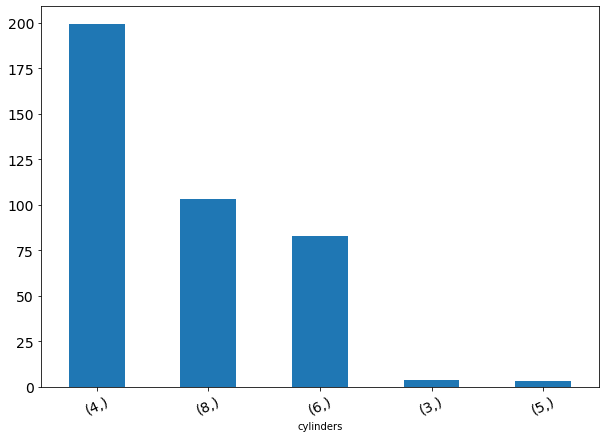

In [9]:
# Gráfico de la variable [cylinders]
data.value_counts(['cylinders']).plot.bar( rot=25, fontsize=14, figsize=(10, 7))

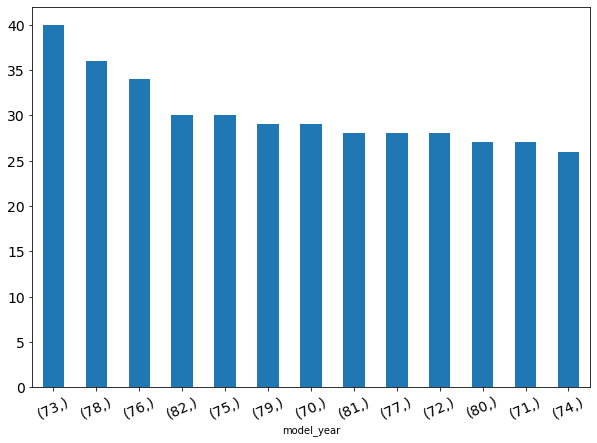

In [10]:
# Gráfico de la variable [model_year]
data.value_counts(['model_year']).plot.bar( rot=25, fontsize=14, figsize=(10, 7))

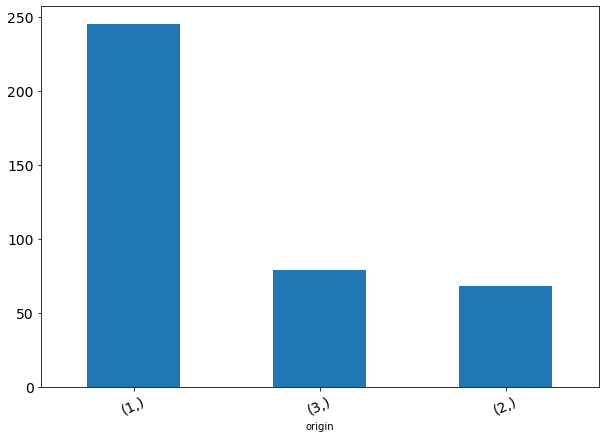

In [11]:
# Gráfico de la variable [origin]
data.value_counts(['origin']).plot.bar( rot=25, fontsize=14, figsize=(10, 7))

### Inspección de las variables continuas

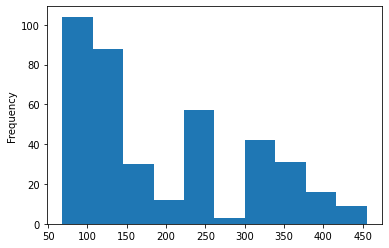

In [12]:
# Gráfico de la variable [displacement]
data['displacement'].plot.hist()

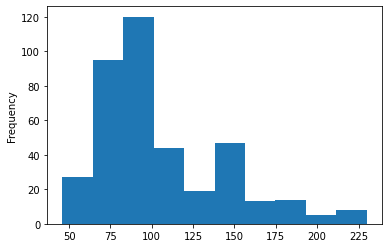

In [13]:
# Gráfico de la variable [horsepower]
data['horsepower'].plot.hist()

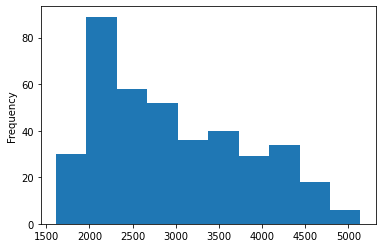

In [14]:
# Gráfico de la variable [weight]
data['weight'].plot.hist()

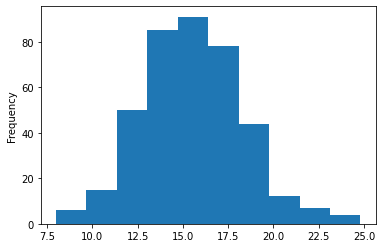

In [15]:
# Gráfico de la variable [acceleration]
data['acceleration'].plot.hist()

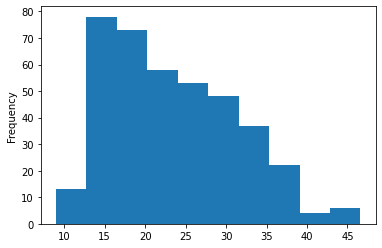

In [16]:
# Gráfico de la variable [mpg]
data['mpg'].plot.hist()

### Correlación entre variables

In [17]:
# Genera la matriz de correlación
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
cylinders,1.00,0.95,0.84,0.90,-0.50,-0.35,-0.57,-0.78
displacement,0.95,1.00,0.90,0.93,-0.54,-0.37,-0.61,-0.81
horsepower,0.84,0.90,1.00,0.86,-0.69,-0.42,-0.46,-0.78
weight,0.90,0.93,0.86,1.00,-0.42,-0.31,-0.59,-0.83
acceleration,-0.50,-0.54,-0.69,-0.42,1.00,0.29,0.21,0.42
model_year,-0.35,-0.37,-0.42,-0.31,0.29,1.00,0.18,0.58
origin,-0.57,-0.61,-0.46,-0.59,0.21,0.18,1.00,0.57
mpg,-0.78,-0.81,-0.78,-0.83,0.42,0.58,0.57,1.00


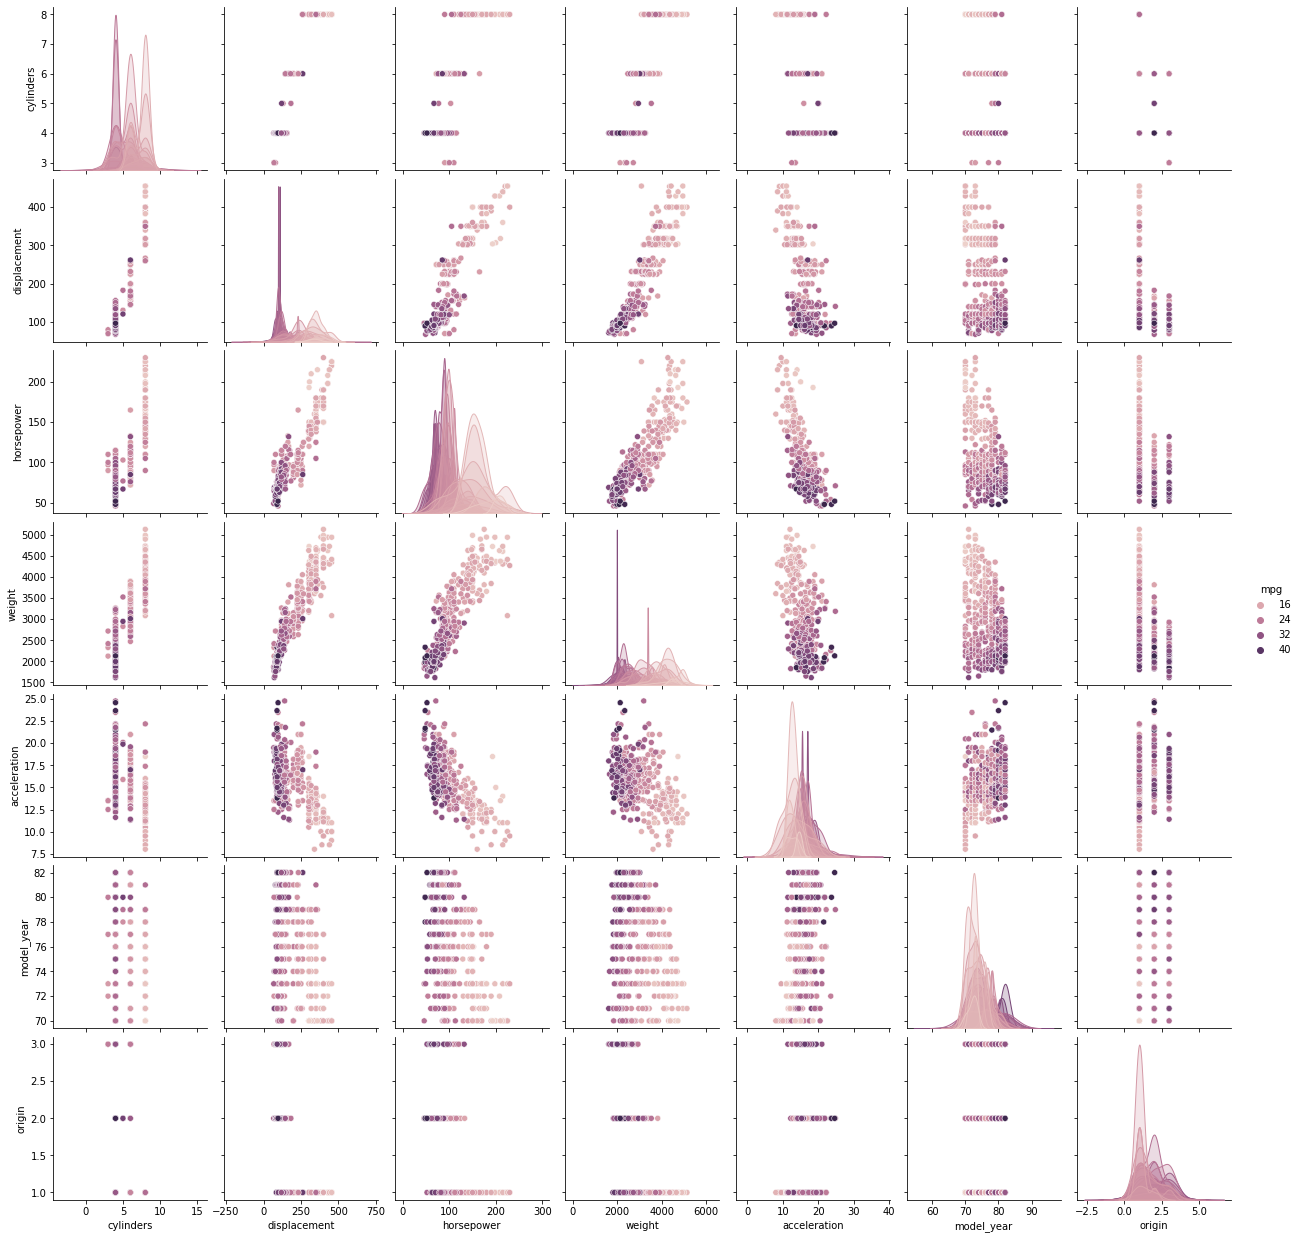

In [19]:
# GRáfica de correlación de variables por mpg
sns.pairplot(data,hue="mpg")

## 3) Preparación y Depuracion de Datos

In [28]:
# Separacion de las variables independientes y dependiente(Objetivo)
target = 'mpg' # variable de interes
features = list(data.columns)
features.remove('mpg')

x = data[features] # Conjunto de datos de varaibles independietes
y = data['mpg'] # COnjunto de datos de la variable dependiente

### Verificación de valores nulos o perdidos

In [20]:
# Verifica si existen valores NAs
data.isna().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64

In [21]:
# Verifica si existen datos NULL
data.isnull().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64

**Explicación:** Al no encontrar existencia de valores perdidos o nulos, no requiere de ningún tratamiento para este caso

### Verificación de Valores Atípicos

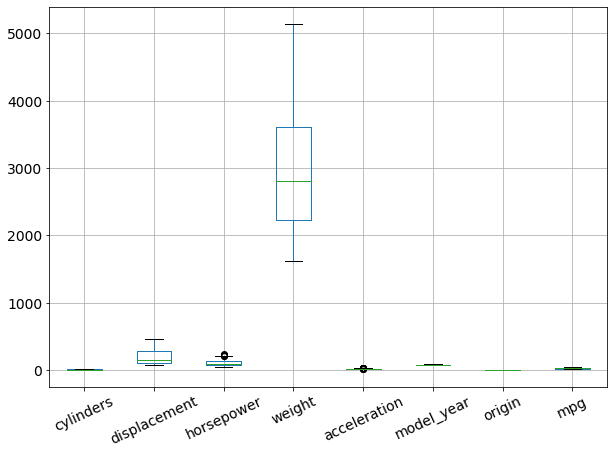

In [23]:
# Gráficas de caja y bigote para determinar valores atípicos
data.boxplot(rot=25, fontsize=14, figsize=(10, 7))

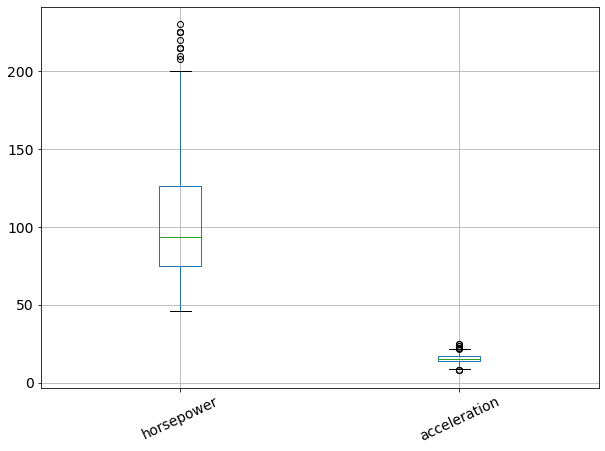

In [27]:
# Gráfica de las variables con evidencia de valores atípcios
data.boxplot(column=['horsepower', 'acceleration'], rot=25, fontsize=14, figsize=(10, 7))

### Tratameinto de valores atípicos


```
# Se puede o no usar esta sección, para probar resultados del modelo considerano o no los valores atípicos
# Se ha decidido reemplazar con el valor máximo a los valores atípicos debido a que la mayoria de outliers se encuentran por encima del último cuartil
```



In [31]:
# Función - Tratamiento de Datos Atípicos (Outliers)
def fixOutliers(df, colOtl, nDs):
  tmp = (df[colOtl] - df[colOtl].mean()) / df[colOtl].std() # Calculamos la desviación estándar
  idx = list(tmp.loc[tmp > nDs].index) # Seleccionamos aquellos que tengan mas de nDs desviaciones, que seran los valores atípicos
  # best_no_outliers = x.loc[~x.index.isin(idx)]['horsepower'].mean() # se pone a consideración usar la media - NO OPTIMO!
  best_no_outliers = df.loc[~df.index.isin(idx)][colOtl].max() # encontrar en valor maximo de los que estan fuera del rango de outliers 
  # best_no_outliers
  x.at[idx,colOtl] = best_no_outliers # Setear el valor maxiomo a aquellos q son outliers
  # df.loc[idx,:]
  return(df)


In [32]:
# Corrección de valores atipicos
fixOutliers(x, 'acceleration', 2) # Se recomienda ejecutar 3 veces el metodo, ya que con la primera pasada aun se evidencia outliear
fixOutliers(x, 'horsepower', 2) 

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8,307.0,130.0,3504.0,12.0,70,1
1,8,350.0,165.0,3693.0,11.5,70,1
2,8,318.0,150.0,3436.0,11.0,70,1
3,8,304.0,150.0,3433.0,12.0,70,1
4,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...
387,4,140.0,86.0,2790.0,15.6,82,1
388,4,97.0,52.0,2130.0,21.0,82,2
389,4,135.0,84.0,2295.0,11.6,82,1
390,4,120.0,79.0,2625.0,18.6,82,1


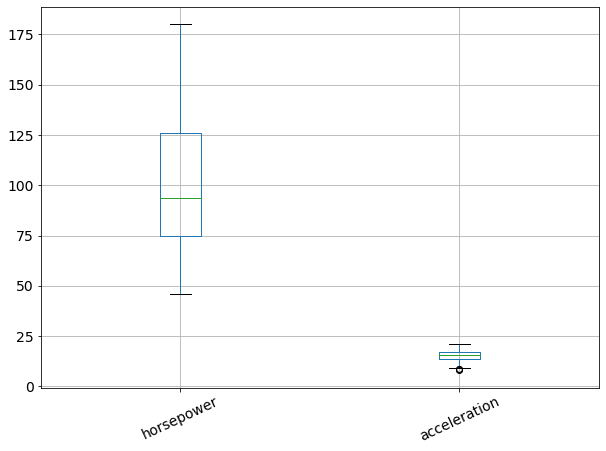

In [33]:
# Visualizando loa gráficas de caja y bigote , corrigiendo outliear!
x.boxplot(column=['horsepower', 'acceleration'], rot=25, fontsize=14, figsize=(10, 7))

### Selección de Características (Variables)

In [34]:
# Comprobar las posibles variables a eliminar en base a su varianza
var_th = VarianceThreshold(threshold = 0.60)
x_var = var_th.fit_transform(x)

print("Variables originales ", x.shape[1])
print("Variables finales ", x_var.shape[1])

print("Listado de variables ", np.asarray(list(x))[var_th.get_support()])

Variables originales  7
Variables finales  7
Listado de variables  ['cylinders' 'displacement' 'horsepower' 'weight' 'acceleration'
 'model_year' 'origin']


In [35]:
# Eliminación de Características multicolinealidad (VIF)
# Método para encontrar las caracteristicas
def calculateVIF(data):
    features = list(data.columns)
    num_features = len(features)
    
    model = LinearRegression()
    
    result = pd.DataFrame(index = ['VIF'], columns = features)
    result = result.fillna(0)
    
    for ite in range(num_features):
        x_features = features[:]
        y_featue = features[ite]
        x_features.remove(y_featue)
        
        x = data[x_features]
        y = data[y_featue]
        
        model.fit(data[x_features], data[y_featue])
        
        result[y_featue] = 1/(1 - model.score(data[x_features], data[y_featue]))
    
    return result

# Eliminación de características
def selectDataUsingVIF(data, max_VIF = 10): # se consdiera una franja de minimo 10 como max_VIF
    result = data.copy(deep = True)
    
    VIF = calculateVIF(result)
    
    while VIF.to_numpy().max() > max_VIF:
        col_max = np.where(VIF == VIF.to_numpy().max())[1][0]
        features = list(result.columns)
        features.remove(features[col_max])
        result = result[features]
        
        VIF = calculateVIF(result)
        
    return result

In [37]:
# Calculamos las características, sin eliminación
calculateVIF(x.copy(deep = True))

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
VIF,10.615392,20.370322,12.737012,12.952687,3.195902,1.248241,1.743041


In [38]:
# Calculamos las características, con eliminación
best_vif = calculateVIF(selectDataUsingVIF(x[features]))
best_vif

,cylinders,weight,acceleration,model_year,origin
VIF,5.966491,5.397791,1.411543,1.159116,1.55642


In [40]:
# Guardamos las caracteristicas mas relevantes
best_vars = list(best_vif.columns)
best_vars

['cylinders', 'weight', 'acceleration', 'model_year', 'origin']

In [41]:
# Selección de caracteristicas con STEPWISE
# Modelo para realizar los ajustes
# x = data[features]
model = LinearRegression()

# Variable para almecena los índices de la lista de atributos usados
feature_order =  []
feature_error = []

# Iteración sobre todas las variables
for i in range(len(features)):
    idx_try = [val for val in range(len(features)) if val not in feature_order]
    iter_error = []

    for i_try in idx_try:
        useRow = feature_order[:]
        useRow.append(i_try)

        use = x[x.columns[useRow]]

        model.fit(use, y)
        rmsError = np.linalg.norm((y - model.predict(use)), 2)/math.sqrt(len(y))
        iter_error.append(rmsError)

    pos_best = np.argmin(iter_error)
    feature_order.append(idx_try[pos_best])
    feature_error.append(iter_error[pos_best])

for i in range(len(features)):
    print("En el paso", i, "se ha insertado la variable", 
        features[feature_order[i]], "con un error", feature_error[i])

En el paso 0 se ha insertado la variable weight con un error 4.321645126270701
En el paso 1 se ha insertado la variable model_year con un error 3.414013752452536
En el paso 2 se ha insertado la variable origin con un error 3.330481225117618
En el paso 3 se ha insertado la variable horsepower con un error 3.30648853146398
En el paso 4 se ha insertado la variable displacement con un error 3.2769210044711268
En el paso 5 se ha insertado la variable cylinders con un error 3.270013071188562
En el paso 6 se ha insertado la variable acceleration con un error 3.263972740790584


Text(0, 0.5, 'Error (RMS)')

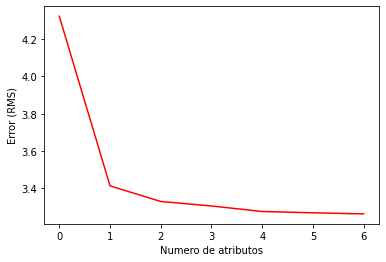

In [43]:
# Gráfica del RMS
plt.plot(range(len(features)), feature_error, 'r-', label = 'Datos')
plt.xlabel('Numero de atributos')
plt.ylabel('Error (RMS)')

In [44]:
# Selección de caracteristicas usando LASSO
model_ridge = Lasso(alpha = 0.1)
model_ridge.fit(x, y)

print(model_ridge.coef_)

[-0.          0.01109942 -0.04740635 -0.00567449 -0.0952867   0.72167643
  1.19767907]


**Consideracion:** Al ejecutar el modelo corrigiendo valores atípicos, dos de los algoritmos (VIF con eliminacion y LASSO) determinan que algunas variables son poco significativas para el entrenamiento.

## 4) Modelamiento

**Nota:** Se recomienda realizar el modelamiento con los algoritmos de Regresión Lineal y de Regresión Lasso (utilizado)

### Selección del modelo

In [45]:
# Seleccionando las variables
x_ba = x # Usa todas las variables
# x_ba = data[best_vars] # descomentar si se desea probar con las variables optimas calculadas en el paso anterior

# Listado de alphas para ser evaluados
alphas = np.array([1, 0.1, 0.01, 0.001, 0.0001])
fit_intercept = np.array([True, False])

# Creación del modelo
# model = LinearRegression()  # Para probar!
model = Lasso()

In [46]:
# Selección del modelo usando GridSearch
grid = GridSearchCV(estimator = model,
                    param_grid = dict(
                        alpha = alphas, # Solo modelo LASSO
                        fit_intercept = fit_intercept              
                                      ),
                    cv = 10)
grid.fit(x_ba, y)

# Los mejores parametros para el modelo
print('El mejor parametro es', grid.best_params_)
print('El mejor score es', grid.best_score_)

El mejor parametro es {'alpha': 0.0001, 'fit_intercept': False}
El mejor score es 0.6522822518170799


In [47]:
# Selección del modelo usando RandomizedSearchCV (Solo Modelo LASSO)
param_grid = dict(alpha = sp_rand()) # Aleatorios de alpha

rsearch = RandomizedSearchCV(estimator = model,
                             param_distributions = param_grid,
                             n_iter = 100,
                             cv = 10,
                             random_state = 1)
rsearch.fit(x_ba, y)

# Los mejores parametros para el modelo
print('El mejor parametro es', rsearch.best_params_)
print('El mejor score es', rsearch.best_score_)

El mejor parametro es {'alpha': 0.00011437481734488664}
El mejor score es 0.6516235840505031


**Explicación:** En ambos metodos de seleccion se observa que el alpha optimo es de** 0.0001** con un score superior al **60%**

### Creación del Modelo

Se determina como modelo mas optimo el de regresión de LASSO, el cual sera usado en esta fase

In [48]:
# División del conjunto de datos para entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(x, y)

# Creación de un modelo
# model = LinearRegression(fit_intercept = True)  # Usar si se selecciono el modelo con Regresión Lineal
model = Lasso(alpha= 0.0001 ,fit_intercept = True, random_state = 1)
model.fit(x_train, y_train)


Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=1,
      selection='cyclic', tol=0.0001, warm_start=False)

## 5) Evaluacion de Modelo

In [49]:
# Evaluando el modelo
predit_train = model.predict(x_train)
predit_test = model.predict(x_test)

# Evaluación de R2
print('R2 en entrenamiento es: ', model.score(x_train, y_train))
print('R2 en validación es: ', model.score(x_test, y_test))

R2 en entrenamiento es:  0.8215386293465219
R2 en validación es:  0.8337440694350411


### CASO GENERICO

In [51]:
# Provando con otros valores
x_generic = pd.DataFrame(
    [[4,320,66,2350,21.5,72,2]], 
    columns= ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin'])
x_generic


,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,4,320,66,2350,21.5,72,2


In [52]:
# Provando con otros valores - CASO GENERICO!
predit_generic = model.predict(x_generic)
predit_generic

array([28.03227388])

### PRUBA CON MUESTRA DE LA DATA REAL

In [53]:
# Selecionamos un conjunto de datos aleatorios 
sample_data = data.sample(n=20)
sample_data

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
192,6,232.0,90.0,3085.0,17.6,76,1,22.5
341,4,81.0,60.0,1760.0,16.1,81,3,35.1
93,8,440.0,215.0,4735.0,11.0,73,1,13.0
142,4,76.0,52.0,1649.0,16.5,74,3,31.0
244,4,78.0,52.0,1985.0,19.4,78,3,32.8
179,4,91.0,53.0,1795.0,17.5,75,3,33.0
86,8,350.0,145.0,3988.0,13.0,73,1,13.0
170,4,90.0,71.0,2223.0,16.5,75,2,25.0
236,4,98.0,83.0,2075.0,15.9,77,1,33.5
95,8,360.0,175.0,3821.0,11.0,73,1,13.0


In [54]:
# Realizamos la prediccón
predit_sample = model.predict(sample_data[features])
predit_sample

array([22.90078195, 36.62389128,  9.11201971, 32.37787202, 33.15754121,
       32.37602971, 14.9599215 , 27.78529857, 28.13868694, 14.78469229,
       12.16471428, 31.73361465, 15.62392055, 33.94830365, 28.73901147,
       36.61884965, 23.3022232 , 24.19327354, 34.29163738, 21.56460571])

In [56]:
# Agregamos la columna de preciccion a la data de muestra
sample_data['predict'] = predit_sample.tolist()
sample_data['delta'] = sample_data.apply(lambda x: abs(x['mpg'] - x['predict']), axis=1) # Calculamos un delta, que seria la distancia entre el valor real y el predecido
sample_data

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg,predict,delta
192,6,232.0,90.0,3085.0,17.6,76,1,22.5,22.900782,0.400782
341,4,81.0,60.0,1760.0,16.1,81,3,35.1,36.623891,1.523891
93,8,440.0,215.0,4735.0,11.0,73,1,13.0,9.112020,3.887980
142,4,76.0,52.0,1649.0,16.5,74,3,31.0,32.377872,1.377872
244,4,78.0,52.0,1985.0,19.4,78,3,32.8,33.157541,0.357541
179,4,91.0,53.0,1795.0,17.5,75,3,33.0,32.376030,0.623970
86,8,350.0,145.0,3988.0,13.0,73,1,13.0,14.959921,1.959921
170,4,90.0,71.0,2223.0,16.5,75,2,25.0,27.785299,2.785299
236,4,98.0,83.0,2075.0,15.9,77,1,33.5,28.138687,5.361313
95,8,360.0,175.0,3821.0,11.0,73,1,13.0,14.784692,1.784692


In [57]:
sample_data['delta'].describe()

count    20.000000
mean      2.199820
std       1.674567
min       0.151696
25%       0.998933
50%       1.897604
75%       2.979590
max       6.302223
Name: delta, dtype: float64

## 6) Conclusiones y Recomendaciones


### Conclusiones
* Existe un gran porcentaje de los registros que son de origen 1 y de igual manera la mayor cantidad de vehículos con 4 cilidros.
* Durante la inspección de la data se pudo observar una fuerte correlación entre las variables ['cylinders',	'displacement',	'horsepower',	'weight'].
* En el proceso de preparación y depuración se evidencia que no existen valores perdidos (NAs, NULL), por lo que no fue necesario realizar un tratamiento.
* Se logró evidenciar durante la preparación de la data que las variables ['horsepower', 'acceleration'] tenían valores atípicos, los cuales pueden ser, o no tratados.
* A los valores atípicos se les aplicó una función asignando el  máximo de aquellos que estaban fuera del rango de los mismos, evidenciando que el modelo mejora considerablemente en su score y distancia del delta predecido respecto al valor real.
* Se eplicó 4 métodos de selección de variables, de los cuales 3 (Método de la Varianza, Stepwise, Lasso), recomiendan conservar todas las variables para su entrenamiento.
* Del proceso de selección del modelo con distintos alphas dio como resultado un modelo menor al 75% que se considera no óptimo para una implementación en producción.
* De una muestra aleatoria de registros originales, se crea el valor 'delta' (mpg - predict), el cual tiene como mejor predicción una distancia de 0.1, y la de mayor error de distancia 5 

### Recomendaciones
* Se recomienda verificar si existen datos atípicos, para una posterior evaluación.
* Se recomienda aplicar un tratamiento para los datos outliers, ya que si se genera un modelo con los datos originales, el score y el delta(mpg-predicción), es muy malo
* Se recomienda realizar otras técnicas para el tratamiento de ouliers, como la eliminación de los mismos, siempre y cuando el conjunto de datos se mas grande.
* Se recomienda realizar una selección de variables por diferentes métodos, para asegurarnos que en la construcción del modelo, estén las variables correctas.